<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORTING-LIBRARIES" data-toc-modified-id="IMPORTING-LIBRARIES-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORTING LIBRARIES</a></span></li><li><span><a href="#LOADING-DATA" data-toc-modified-id="LOADING-DATA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LOADING DATA</a></span></li><li><span><a href="#DATA-CLEANING" data-toc-modified-id="DATA-CLEANING-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DATA CLEANING</a></span></li><li><span><a href="#DATA-EXPLORATION" data-toc-modified-id="DATA-EXPLORATION-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DATA EXPLORATION</a></span><ul class="toc-item"><li><span><a href="#игры-с-высоким-рейтингом" data-toc-modified-id="игры-с-высоким-рейтингом-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>игры с высоким рейтингом</a></span></li><li><span><a href="#игры-которые-чаще-всего-оценивают" data-toc-modified-id="игры-которые-чаще-всего-оценивают-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>игры которые чаще всего оценивают</a></span></li><li><span><a href="#сколько-игр-оценивают-пользователи" data-toc-modified-id="сколько-игр-оценивают-пользователи-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>сколько игр оценивают пользователи</a></span></li><li><span><a href="#распределение-количества-оценок-по-юзерам" data-toc-modified-id="распределение-количества-оценок-по-юзерам-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>распределение количества оценок по юзерам</a></span></li><li><span><a href="#дополнения-к-играм" data-toc-modified-id="дополнения-к-играм-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>дополнения к играм</a></span></li></ul></li><li><span><a href="#DATA-PREPROCESSING" data-toc-modified-id="DATA-PREPROCESSING-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>DATA PREPROCESSING</a></span><ul class="toc-item"><li><span><a href="#изменение-типов-данных" data-toc-modified-id="изменение-типов-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>изменение типов данных</a></span></li><li><span><a href="#создание-фичей" data-toc-modified-id="создание-фичей-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>создание фичей</a></span></li><li><span><a href="#корреляция-данных" data-toc-modified-id="корреляция-данных-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>корреляция данных</a></span></li><li><span><a href="#подготовка-данных-к-обучению" data-toc-modified-id="подготовка-данных-к-обучению-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>подготовка данных к обучению</a></span></li></ul></li><li><span><a href="#RECOMMENDER-SYSTEMS" data-toc-modified-id="RECOMMENDER-SYSTEMS-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>RECOMMENDER SYSTEMS</a></span><ul class="toc-item"><li><span><a href="#Content-Based" data-toc-modified-id="Content-Based-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Content Based</a></span></li><li><span><a href="#Collaborative-Filtering" data-toc-modified-id="Collaborative-Filtering-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Collaborative Filtering</a></span></li><li><span><a href="#Hybrid-model" data-toc-modified-id="Hybrid-model-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Hybrid model</a></span></li></ul></li></ul></div>

# EDA

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from datetime import datetime

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler, LabelEncoder

from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, auc_score, recall_at_k

import pickle

/Users/pgagp/opt/anaconda3/lib/python3.9/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


## LOADING DATA

In [2]:
games = pd.read_csv('games.csv', index_col=0)
users = pd.read_csv('user_raiting_games.csv', index_col=0, low_memory=False)
categories = pd.read_csv('df_types.csv', index_col=0)

Ознакомимся с данными по играм в датафрейме games.

In [3]:
games.sample(3)

,id,teseraId,bggId,title,alias,descriptionShort,description,modificationDateUtc,creationDateUtc,photoUrl,...,playersAgeMin,timeToLearn,playtimeMin,playtimeMax,commentsTotal,commentsTotalNew,isAddition,id_type,title2,title3
53690,43870,2135834,0,Malta Besieged: 1940-1942,malta-besieged,That Scorpion of the Sea: Malta Besieged is a ...,<p>That Scorpion of the Sea: Malta Besieged is...,2022-09-20T09:31:19,2022-09-20T09:30:27,"https://s.tesera.ru/images/items/2135834,3/200...",...,0,0,0,0,0,0,False,29,NaN,NaN
1702,39206,1850237,0,Warcry: Scions of the Flame,warcry-scions-of-the-flame,Варбанда (боевой отряд) из скирмиш-варгейма Ag...,<p>Даже пр сравнению с другими последователями...,2021-03-19T14:45:05,2021-03-19T14:34:06,"https://s.tesera.ru/images/items/1850237,3/200...",...,0,0,0,0,0,0,True,42,NaN,Боевой клич: Отпрыски огня
42653,39368,1865098,0,Mythic Battles: Ragnarok - Nidhogg,mythic-battles-ragnarok-nidhogg,"Дополнение, которое позволит вам включить могу...",<p><i>Нидхёгг обитает между корнями Мирового Д...,2021-04-15T17:58:22,2021-04-15T16:36:37,"https://s.tesera.ru/images/items/1865098,3/200...",...,14,0,60,90,0,0,True,56,NaN,NaN


In [4]:
games.shape

(76041, 32)

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76041 entries, 0 to 76040
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   76041 non-null  int64  
 1   teseraId             76041 non-null  int64  
 2   bggId                76041 non-null  int64  
 3   title                76041 non-null  object 
 4   alias                76041 non-null  object 
 5   descriptionShort     62749 non-null  object 
 6   description          62566 non-null  object 
 7   modificationDateUtc  76041 non-null  object 
 8   creationDateUtc      76041 non-null  object 
 9   photoUrl             75749 non-null  object 
 10  year                 76041 non-null  int64  
 11  ratingUser           76041 non-null  float64
 12  n10Rating            76041 non-null  float64
 13  n20Rating            76041 non-null  float64
 14  bggRating            76041 non-null  float64
 15  bggGeekRating        76041 non-null 

- 'id' - идентификатор
- 'teseraId' - идентификатор игры tesera.ru
- 'bggId' - идентификатор игры boardgamegeek.com
- 'title' - название игры (локализованные игры обозначены на русском языке)
- 'alias' - "псевдоним" игры, на tesera.ru используется как id
- 'descriptionShort' - короткое описание игры
- 'description' - описание игры
- 'modificationDateUtc' - дата последнего внесения изменений tesera.ru
- 'creationDateUtc' - дата создания на tesera.ru
- 'photoUrl' - url фотографий
- 'year' - год выпуска игры
- 'ratingUser' - средний рейтинг игры на tesera.ru
- 'n10Rating' - нет данных
- 'n20Rating' - нет данных
- 'bggRating' - редний рейтинг игры на boardgamegeek.com
- 'bggGeekRating' - 
- 'bggNumVotes' - количество голосов на boardgamegeek.com
- 'numVotes' - нет данных
- 'playersMin' - минимальное количество игроков по правилам
- 'playersMax' - максимальное количество игроков по правилам
- 'playersMinRecommend' - минимальное количество игроков по мнению игроков
- 'playersMaxRecommend' - максимальное количество игроков по мнению игроков
- 'playersAgeMin' - минимальный возраст игроков
- 'timeToLearn' - время освоения
- 'playtimeMin' - минимальное время для партии
- 'playtimeMax' - максимальное время для партии
- 'commentsTotal' - количетсво комментариев к игре
- 'commentsTotalNew' - количетсво новых комментариев к игре
- 'isAddition' - True - является дополнением к игре, False - самостоятельная игра
- 'id_type' - id категории игры
- 'title2' - нет данных
- 'title3' - нет данных

В данных есть пропуски и пустые значения (Nan). В некоторых столбцах необходимо изменить тип данных.

In [6]:
users.head(3)

,creationDateUtc,rating,game_alias,author.teseraId,author.id,author.login,author.name,author.rating,author.teseraUrl,author.avatarUrl,comment
0,2023-01-27T07:17:05.816808,6.00,jinx,303746,6623,greyve,Ник,3387,https://tesera.ru/user/303746,NaN,NaN
1,2023-01-19T08:07:44,9.50,warhammer-underworlds-gnarlwood,530973,12169,fateweaver,Fateweaver,412,https://tesera.ru/user/530973,"https://s.tesera.ru/images/items/530973,22/pho...",NaN
2,2023-02-10T10:45:19.123895,6.25,epichnyye-skhvatki-boyevykh-magov-krutagidon-e...,1339152,37465,proton1,Даниил,181,https://tesera.ru/user/1339152,"https://s.tesera.ru/images/items/1339152,22/ph...",NaN


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390467 entries, 0 to 390466
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   creationDateUtc   390467 non-null  object 
 1   rating            390467 non-null  float64
 2   game_alias        390467 non-null  object 
 3   author.teseraId   390467 non-null  int64  
 4   author.id         390467 non-null  int64  
 5   author.login      390461 non-null  object 
 6   author.name       390467 non-null  object 
 7   author.rating     390467 non-null  int64  
 8   author.teseraUrl  390467 non-null  object 
 9   author.avatarUrl  309285 non-null  object 
 10  comment           7 non-null       object 
dtypes: float64(1), int64(3), object(7)
memory usage: 35.7+ MB


- 'creationDateUtc' - дата регистарции юзера
- 'rating' - оценка которую поставил юзер игре
- 'game_alias' - псевдоним игры на tesera.ru
- 'author.teseraId' - идентификатор юзера на tesera.ru
- 'author.id' - идентификатор юзера 
- 'author.login' - никнейм юзера
- 'author.name' - имя юзера
- 'author.rating' - рейтинг юзера
- 'author.teseraUrl' - Url на страницу юзера
- 'author.avatarUrl' - Url фотографии
- 'comment' - коментарии

В датафрейме можно удалить столбцы с пропусками

In [8]:
categories.head(3)

,id,name,parentId
0,31,Азартные,NaN
1,42,Война,NaN
2,30,Карты,NaN


In [9]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 45
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        87 non-null     int64  
 1   name      87 non-null     object 
 2   parentId  33 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ KB


В данный датафрейм представляет из себя название, id категорий (тип/сеттинг) игр. Некоторые категории имеют подкатегории (parentId).

## DATA CLEANING

Перед чисткой данных от аномалий, вбросов, пропусков, добавляю в датафрейм games название категорий игр.
Так как при парсинге данных я добавляла столбец с id категории, а одна игра может относится к нескольким категориям сразу соответственно будут явные дубликаты.

In [10]:
# переименую название столбца по которуму будет объединение 

categories = categories.rename(columns={'id': 'id_type'})

In [11]:
games = games.merge(categories.iloc[:,:-1], on='id_type')

In [12]:
# объединение категорий (если их несколько) в одну строку для каждой игры
games_new = games.groupby('teseraId')['name'].apply(lambda x: ','.join(map(str, x))).reset_index(name='category')

In [13]:
games['name'].nunique()

86

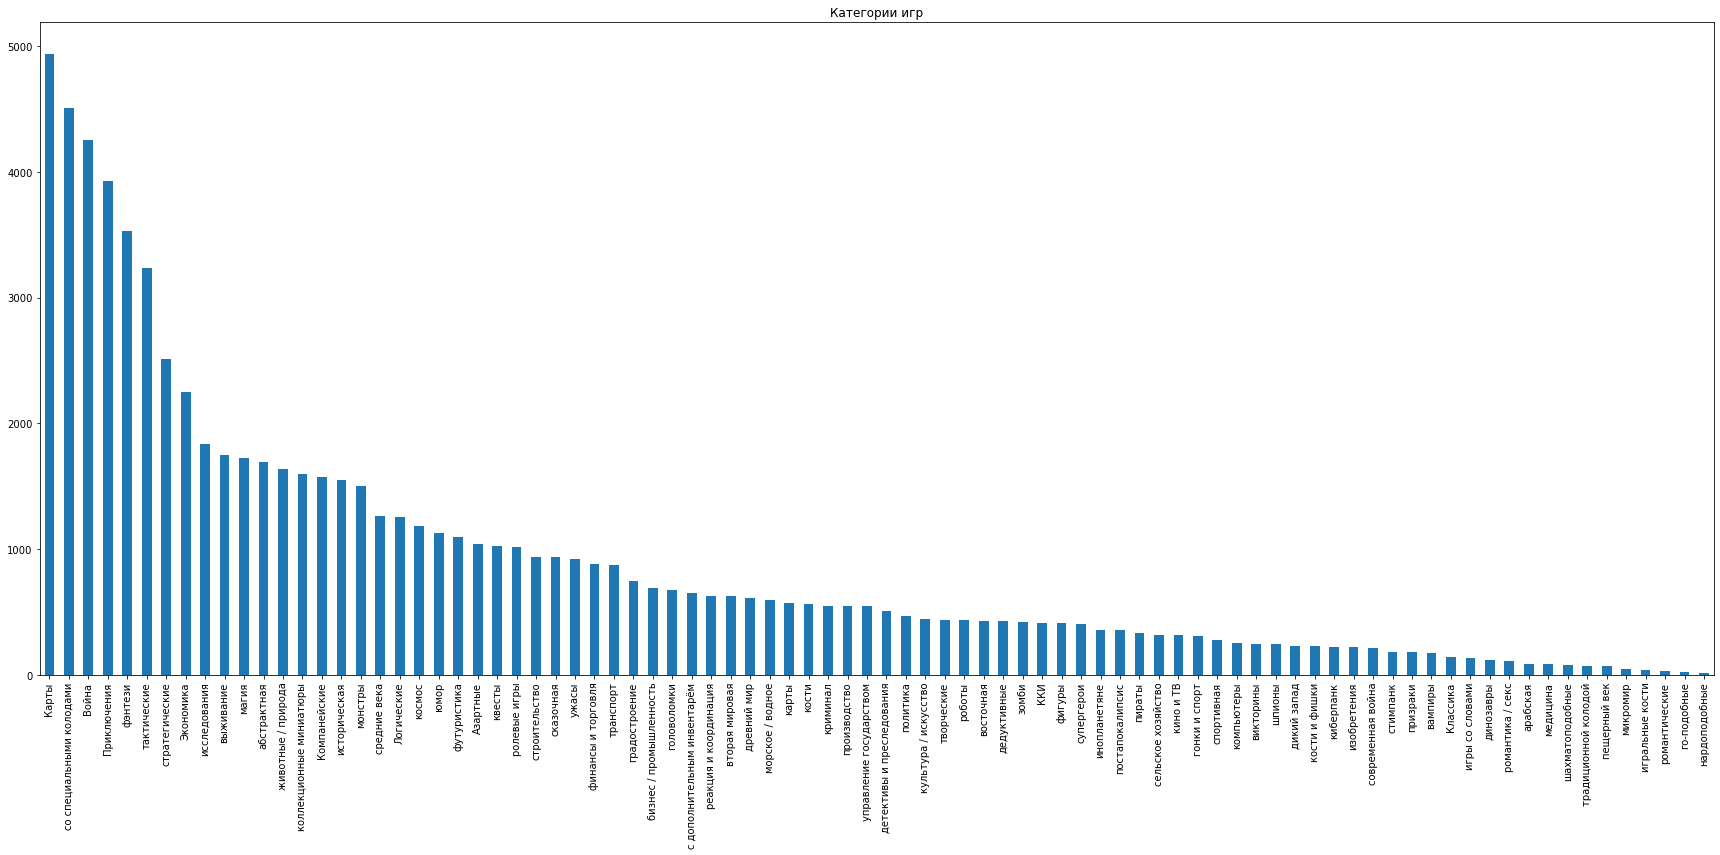

In [14]:
# распределение игр по категориям, типам

plt.figure(figsize=(30,12))
games['name'].value_counts().plot(kind='bar')
plt.title('Категории игр')
plt.show()

In [15]:
# удаляю дубликаты по teseraId
games = pd.merge(games.drop_duplicates(subset='teseraId'), games_new, on='teseraId')

In [16]:
games.shape

(18618, 34)

Всего 18 618 игр

In [17]:
# Проверю наличие пустых значений в датафрейме

games.isna().sum()

id                         0
teseraId                   0
bggId                      0
title                      0
alias                      0
descriptionShort        3946
description             4000
modificationDateUtc        0
creationDateUtc            0
photoUrl                  84
year                       0
ratingUser                 0
n10Rating                  0
n20Rating                  0
bggRating                  0
bggGeekRating              0
bggNumVotes                0
numVotes                   0
playersMin                 0
playersMax                 0
playersMinRecommend        0
playersMaxRecommend        0
playersAgeMin              0
timeToLearn                0
playtimeMin                0
playtimeMax                0
commentsTotal              0
commentsTotalNew           0
isAddition                 0
id_type                    0
title2                 13577
title3                 15745
name                       0
category                   0
dtype: int64

In [18]:
games[games['title2'].notna()].sample(2)

,id,teseraId,bggId,title,alias,descriptionShort,description,modificationDateUtc,creationDateUtc,photoUrl,...,playtimeMin,playtimeMax,commentsTotal,commentsTotalNew,isAddition,id_type,title2,title3,name,category
17739,6041,298037,137406,Templar: The Secret Treasures,Templar-Secret-Treasures,«Тамплиер» — это игра для 2-5 игроков. Игроки ...,<p>На карте монастыря 5 жадных тамплиеров пряч...,2021-12-27T12:02:46,2013-08-06T19:36:46,"https://s.tesera.ru/images/items/298037,3/200x...",...,45,60,2,0,False,87,Тамплиер: Тайные сокровища,NaN,политика,"политика,средние века"
8368,2578,35019,76247,Eaten By Zombies!,Eaten-By-Zombies,Eaten by Zombies! — карточная игра о нашествии...,<p>Eaten by Zombies! &mdash; карточная игра о ...,2019-03-08T03:48:49,2011-04-06T21:15:04,"https://s.tesera.ru/images/items/35019,3/200x2...",...,15,30,0,0,False,30,Еда для зомби,NaN,Карты,"Карты,Приключения,выживание,со специальными ко..."


Пропусков в столбцах title2, title3 довольно много, в них указано название игры на других языках, поэтому столбцы можно удалить. Ссылки photoUrl и подкатегории parentId для проекта не понадобятся. Строки с пропусками в описании придется тоже удалить.

In [19]:
# настрока вывода
pd.set_option('display.max_columns', 23)

In [20]:
games.describe()

,id,teseraId,bggId,year,ratingUser,n10Rating,n20Rating,bggRating,bggGeekRating,bggNumVotes,numVotes,playersMin,playersMax,playersMinRecommend,playersMaxRecommend,playersAgeMin,timeToLearn,playtimeMin,playtimeMax,commentsTotal,commentsTotalNew,id_type
count,18618.000000,1.861800e+04,1.861800e+04,18618.000000,18618.000000,18618.000000,18618.000000,18618.000000,18618.000000,18618.000000,18618.000000,18618.000000,18618.000000,18618.000000,18618.000000,18618.000000,18618.000000,18618.000000,18618.000000,18618.000000,18618.0,18618.000000
mean,20020.253035,9.801379e+05,9.346188e+04,1768.644591,4.427385,1.416253,0.945399,3.773097,2.867497,1084.372543,20.074713,1.715813,4.616554,1.245569,1.937802,9.109679,6.926308,36.975078,58.494145,14.600978,0.0,119.466860
std,15575.257900,7.160576e+05,2.467147e+05,658.017750,3.450636,2.727515,2.329728,3.535102,2.993901,4795.550599,86.287543,0.855122,6.756214,1.632169,4.621728,4.764881,21.258421,42.624004,82.874296,105.270432,0.0,553.815484
min,1.000000,1.100000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,25.000000
25%,5910.250000,2.834545e+05,0.000000e+00,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,7.000000,0.000000,10.000000,0.000000,0.000000,0.0,31.000000
50%,13181.500000,9.599430e+05,1.016550e+04,2014.000000,6.000000,0.000000,0.000000,5.670500,0.000000,18.000000,2.000000,2.000000,4.000000,0.000000,0.000000,10.000000,0.000000,30.000000,40.000000,0.000000,0.0,42.000000
75%,36459.750000,1.617278e+06,1.761842e+05,2019.000000,7.340000,0.000000,0.000000,7.090000,5.719000,427.750000,7.000000,2.000000,6.000000,2.000000,4.000000,13.000000,10.000000,50.000000,90.000000,3.000000,0.0,93.000000
max,45231.000000,2.193739e+06,2.657869e+07,2921.000000,10.000000,8.770000,8.720000,10.000000,8.439000,117442.000000,2139.000000,12.000000,99.000000,30.000000,99.000000,80.000000,999.000000,999.000000,999.000000,4992.000000,0.0,8198.000000


В числовых данных довольно много нулевых значений, более детально рассмотрю на графиках

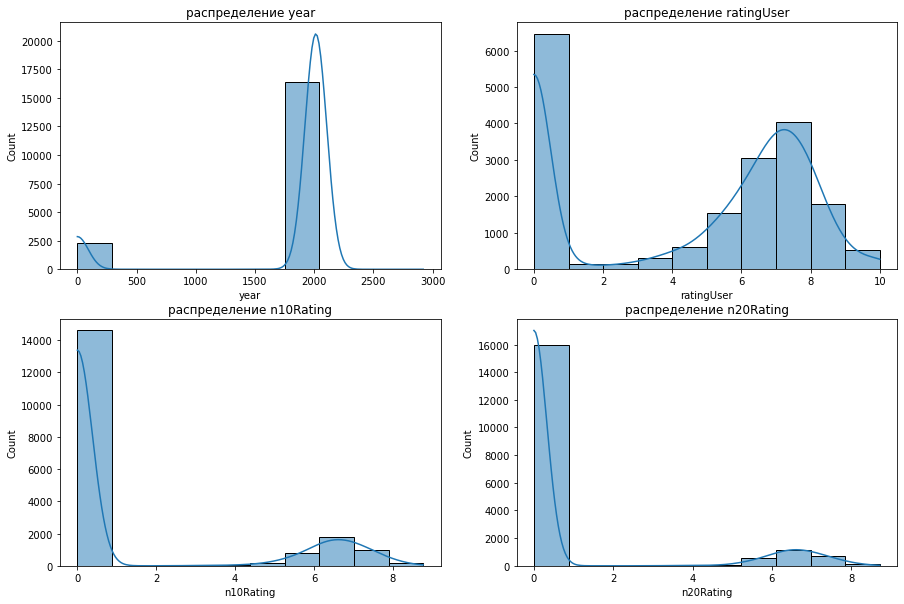

In [21]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(games.describe().columns[3:7], 0):
    plt.subplot(221 + i)
    sns.histplot(games[column], bins=10, kde=True)
    plt.title(f'распределение {column}')

plt.show()

в столбцах n10Rating, n20Rating, playersMinRecommend, playersMaxRecommend, timeToLearn, playtimeMax
commentsTotalNew медианное значение равно 0 - думаю их можно удалить тк они малоинформативны.

<AxesSubplot:xlabel='year', ylabel='Density'>

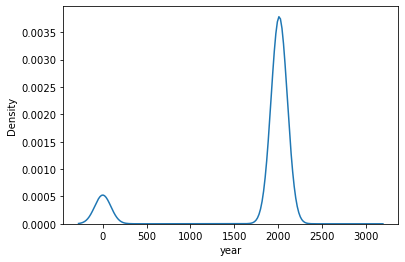

In [22]:
# распределение данных по годам выпуска игр 

sns.kdeplot(data=games['year'])

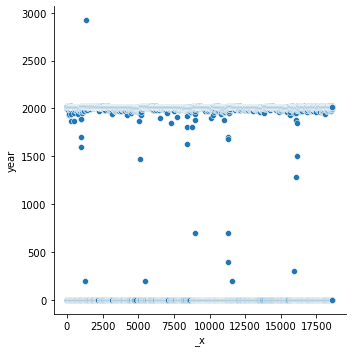

In [23]:
sns.relplot(data=games['year'])

In [24]:
games[games['year'] <= 1850]['year'].value_counts().sort_values(ascending=False)

0       2257
202        3
1700       2
700        2
1600       1
1          1
1475       1
1630       1
1802       1
1810       1
400        1
1680       1
300        1
1283       1
1500       1
1850       1
Name: year, dtype: int64

Фанфакт. Самая старейшая настольная игра 300 года - Тафл (tafl).
Нулевые значения заполню медианным значением.

In [25]:
games['year'].sort_values(ascending=False)

1360     2921
9115     2029
1726     2029
1047     2025
11391    2024
         ... 
10889       0
10890       0
10893       0
10898       0
18617       0
Name: year, Length: 18618, dtype: int64

In [26]:
games['year'] = games['year'].replace(2921, 2021)

В датафрейме есть также игры которые только ожидаются. Игра от 2921 была ошибочно записана, настоящий год выпуска 2019.

Проверю наличие явных дубликатов в датафреймах

In [27]:
games.duplicated().sum()

0

In [28]:
users.duplicated().sum()

1514

In [29]:
#удаляю дубликаты

users = users.drop_duplicates()

In [30]:
# посмотрю сколько уникальных юзеров в датафрейме

users['author.id'].nunique()

11791

In [31]:
# сколько уникальных игр оценили

users['game_alias'].nunique()

14711

In [32]:
users.shape

(388953, 11)

В датафрейме games несколько столбцов подлежат удалению из-за большого количества нулевых значений. 

- всего игр в датасете games - 18 618
- всего юзеров в датасете users - 11 791
- всего оцененных уникальных игр - 14 711
- общее количество всех оцененный игр пользователями 388 953

## DATA EXPLORATION

### игры с высоким рейтингом

In [33]:
# рассмотрим игры по рейтингу пользователей tesera.ru

games['ratingUser'].describe()

count    18618.000000
mean         4.427385
std          3.450636
min          0.000000
25%          0.000000
50%          6.000000
75%          7.340000
max         10.000000
Name: ratingUser, dtype: float64

In [34]:
games.query('ratingUser == 10')

,id,teseraId,bggId,title,alias,descriptionShort,description,modificationDateUtc,creationDateUtc,photoUrl,year,...,timeToLearn,playtimeMin,playtimeMax,commentsTotal,commentsTotalNew,isAddition,id_type,title2,title3,name,category
92,41107,1993451,0,Кайтэн-Дзуси,kaitenzushi-travel,"Добро пожаловать в ресторан ""Кайтэн-дзуси"", гд...","<p>Добро пожаловать в ресторан ""Кайтэн-дзуси"",...",2021-12-10T12:58:30,2021-12-10T11:27:54,"https://s.tesera.ru/images/items/1993451,3/200...",2021,...,10,30,40,0,0,False,31,Дорожная версия,NaN,Азартные,"Азартные,Компанейские,реакция и координация,ка..."
206,38293,1772613,295617,Пей! Пей! Пей!,peipeipei,Пей! Пей! Пей! – это больше двухсот веселых за...,<p>&nbsp;</p>\r\n<p><strong>Пей! Пей! Пей!</st...,2022-04-06T13:45:36,2020-11-09T14:58:36,"https://s.tesera.ru/images/items/1772613,3/200...",2020,...,5,15,0,0,0,False,31,Drink Drank Drunk: The Game of Mis-Beer-Having,NaN,Азартные,"Азартные,карты,юмор"
235,37736,1731949,0,Мир чудес,mir-chudes,NaN,NaN,2020-08-28T05:14:25,2020-08-28T05:06:33,"https://s.tesera.ru/images/items/1731949,3/200...",1997,...,10,0,0,0,0,False,31,NaN,NaN,Азартные,"Азартные,Война,Карты,Классика,Компанейские,Лог..."
273,37088,1679530,0,Арифмемори,arifmemori,Тренируем память и считаем в уме играючи!,<p>Быстро считать в уме &ndash; это просто! В ...,2021-04-07T19:00:12,2020-05-23T11:58:06,"https://s.tesera.ru/images/items/1679530,3/200...",2020,...,1,15,0,0,0,False,31,NaN,NaN,Азартные,"Азартные,Карты,карты,со специальными колодами,..."
292,36685,1639363,281073,Cat Lady: Premium Edition,cat-lady-premium-edition,NaN,NaN,2020-03-17T18:53:55,2020-03-17T18:52:51,"https://s.tesera.ru/images/items/1639363,3/200...",2019,...,5,15,30,0,0,False,31,NaN,NaN,Азартные,"Азартные,карты,животные / природа"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18242,29613,1262413,0,Ticket to Ride: Character Score Markers,ticket-to-ride-character-score-markers,NaN,NaN,2018-08-30T08:38:54,2018-05-30T06:11:48,"https://s.tesera.ru/images/items/1262413,3/200...",2013,...,0,0,0,0,0,False,75,NaN,NaN,транспорт,транспорт
18302,10337,689511,0,Frankenstein's Bodies,frankensteins-bodies,NaN,NaN,2018-01-24T20:46:45,2016-01-11T11:09:17,"https://s.tesera.ru/images/items/689511,3/200x...",2014,...,10,0,60,3,0,False,85,NaN,NaN,ужасы,ужасы
18355,43618,2117043,0,Legends of Andor: The Cold Eternal,legends-of-andor-the-cold-eternal,Действие The Cold Eternal разворачивается в ве...,<p>Действие <strong><i>The Cold Eternal</i> </...,2023-01-31T22:24:02,2022-08-05T00:36:16,"https://s.tesera.ru/images/items/2117043,3/200...",2022,...,0,60,90,3,0,False,28,NaN,Die Legenden von Andor: Die Ewige Kälte,фэнтези,фэнтези
18372,41969,2030707,353677,Darkest Doom,darkest-doom,Darkest Doom — это соревновательная стратегиче...,<p><strong><i>Darkest Doom</i></strong> &mdash...,2022-11-29T08:28:32,2022-02-06T02:22:47,"https://s.tesera.ru/images/items/2030707,3/200...",2023,...,0,90,120,46,0,False,28,NaN,NaN,фэнтези,фэнтези


207 игр имеют наивысший рейтинг

### игры которые чаще всего оценивают

In [35]:
# Игры которые чаще всего оценивают

pivot = pd.pivot_table(users, values= 'rating', index='game_alias',
                    aggfunc={'rating': [np.mean, 'count']})

pivot.sort_values(by='count', ascending=False).head(15)

,count,mean
game_alias,,
carcassonne,2138,7.520463
terraforming-mars,1980,8.525000
citadels,1914,7.307732
munchkin,1810,5.929972
7-wonders-duel,1761,8.337024
the-settlers-of-catan,1750,7.146429
ticket-ride-europe,1743,7.713999
7-wonders,1681,8.186347
Eldritch-Horror,1648,8.196602


Топ 15 самых оцененных игр на tesera.ru. Игру Каркассон (Carcassonne) оценило 2138 человек.
Игра Покорение Марса (terraforming-mars) - моя любимая =)

In [36]:
# отфильтрую по количеству оценок - показывать игры которые оценили свыше 20 юзеров

pivot.query('count > 20').sort_values(by='mean', ascending=False).head(15)

,count,mean
game_alias,,
twilight-imperium-fourth-edition-prophecy-of-kings,76,9.144737
spirit-island-the-jagged-earth,39,9.108974
Feast-Odin-First-Expansion,34,8.941176
mage-knight-ultimate-edition,366,8.870902
Root-the-exiles-and-partisans-deck,23,8.858696
pax-renaissance-second-edition,103,8.854369
twilight-imperium-fourth-edition,510,8.836275
forbidden-stars-forgotten-worlds,21,8.833333
nemesis-aftermath,27,8.824074


Получается игра с самой высокой средней оценкой - Осквернённый Грааль. Кампании «Эпоха легенд» и «Последний рыцарь»
(Tainted Grail: Age of Legends & Last Knight Campaigns)

###  сколько игр оценивают пользователи

In [37]:
#  сколько максимаоьно игр оценивают пользователи

count_rat_user = users.groupby('author.teseraId')['rating'].agg('count').sort_values(ascending=False)
count_rat_user.head(15)

author.teseraId
195924     2095
1473870    1756
615195     1708
1146444    1438
47762      1256
387934     1189
333437     1139
179781     1132
1907513    1119
6924       1118
303746      906
15105       903
767703      848
27978       846
635684      833
Name: rating, dtype: int64

Больше всех игр оценил пользователь с author.teseraId 195924 аж 2095!

### распределение количества оценок по юзерам

In [38]:
user_count = users.groupby('author.teseraId').count()[['game_alias']]

(0.0, 250.0)

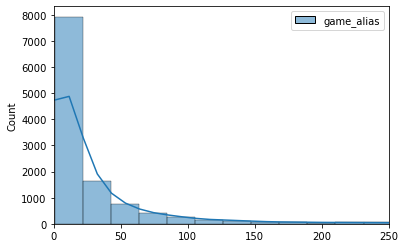

In [39]:
r = sns.histplot(data=user_count, kde=True, bins=100)
r.set_xlim([0, 250])

In [40]:
user_count.describe()

,game_alias
count,11791.000000
mean,32.987278
std,78.874750
min,1.000000
25%,2.000000
50%,10.000000
75%,31.000000
max,2095.000000


В среднем 33 игры оценено 1 юзером, но значения данных разбросаны относительно среднего, и данные имеют высокую изменчивость

### дополнения к играм

In [40]:
games['isAddition'].value_counts()

False    13234
True      5384
Name: isAddition, dtype: int64

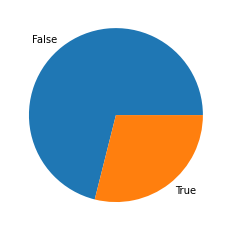

In [42]:
# сколько всего дополнений в датасете games

fig1, ax1 = plt.subplots()
ax1.pie(games['isAddition'].value_counts(), 
        labels=games['isAddition'].unique())
plt.show()

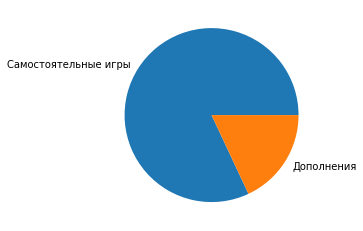

In [43]:
# есть оценки у дополнений, если да, то сколько?

adds = games.query('isAddition==True')['alias']

fig1, ax1 = plt.subplots()
labels = ['Самостоятельные игры', 'Дополнения']
ax1.pie(users['game_alias'].isin(adds).value_counts(), 
        labels = labels)
plt.show()

In [44]:
users['game_alias'].isin(adds).value_counts()

False    318845
True      70108
Name: game_alias, dtype: int64

40% игр в датасете games явяляются дополнениями, 22% от оцененных игр в users - дополнения.

## DATA PREPROCESSING

### изменение типов данных

In [45]:
users.head(2)

,creationDateUtc,rating,game_alias,author.teseraId,author.id,author.login,author.name,author.rating,author.teseraUrl,author.avatarUrl,comment
0,2023-01-27T07:17:05.816808,6.0,jinx,303746,6623,greyve,Ник,3387,https://tesera.ru/user/303746,NaN,NaN
1,2023-01-19T08:07:44,9.5,warhammer-underworlds-gnarlwood,530973,12169,fateweaver,Fateweaver,412,https://tesera.ru/user/530973,"https://s.tesera.ru/images/items/530973,22/pho...",NaN


In [46]:
# привожу дату в корректный формат, булевое значение в int

games['creationDateUtc'] = pd.to_datetime(games['creationDateUtc']).dt.date
games['isAddition'] = games['isAddition'].astype('int')

users['creationDateUtc'] = pd.to_datetime(users['creationDateUtc']).dt.date

In [47]:
users.rename(columns={'author.teseraId': 'user_teseraid', 
                      'author.login': 'user_login', 'author.rating':'user_rating'}, inplace=True)

###  создание фичей

In [48]:
# создаю новый признак - количество дней со дня публикации игры

today = datetime.today().date()
games['days_count'] = (today - games['creationDateUtc']).dt.days
users['days_count'] = (today - users['creationDateUtc']).dt.days

In [49]:
games['days_count'].max()

5222

Одна из первых игр была создана на tesera.ru 5221 дней (14 лет) назад

In [50]:
games['days_count'].max()

5222

и первый пользователь тоже

### корреляция данных

<AxesSubplot:>

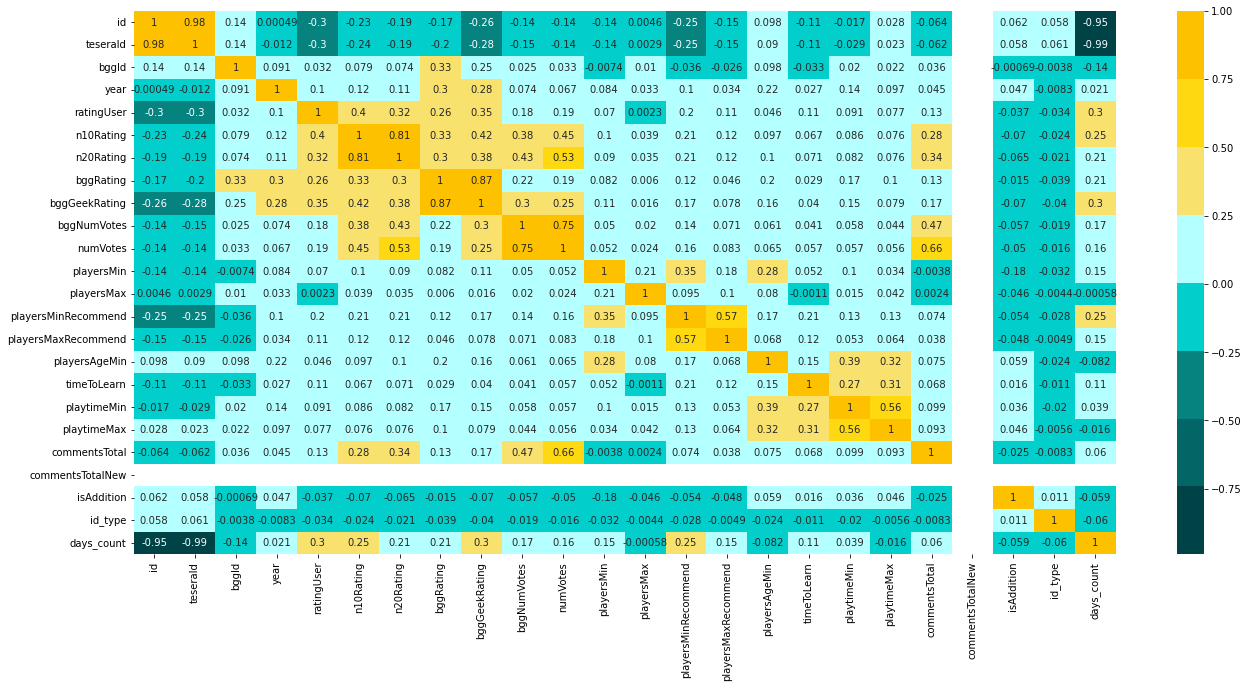

In [51]:
plt.figure(figsize=(22,10))
sns.heatmap(games.corr(), annot=True, 
            cmap=['#004346', '#036666', '#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

В принципе ожидаемо связь видна только между связанными данными, например id и teseraid. 

### подготовка данных к обучению

In [52]:
games = games.drop(columns=['id', 'bggId', 'modificationDateUtc', 'photoUrl',
                            'commentsTotalNew', 'title2', 'title3', 'id_type'])

In [53]:
df_content_based = games.copy()

In [54]:
df_content_based.dropna(subset=['descriptionShort', 'description'], inplace=True, axis=0)
df_content_based = df_content_based.reset_index(drop=True)
df_content_based.isna().sum()

teseraId               0
title                  0
alias                  0
descriptionShort       0
description            0
creationDateUtc        0
year                   0
ratingUser             0
n10Rating              0
n20Rating              0
bggRating              0
bggGeekRating          0
bggNumVotes            0
numVotes               0
playersMin             0
playersMax             0
playersMinRecommend    0
playersMaxRecommend    0
playersAgeMin          0
timeToLearn            0
playtimeMin            0
playtimeMax            0
commentsTotal          0
isAddition             0
name                   0
category               0
days_count             0
dtype: int64

## RECOMMENDER SYSTEMS

###  Content Based

Content based использует данные исключительно об элементах (item). Для этого нужно иметь минимальное представление о предпочтениях пользователей, чтобы затем рекомендовать новые элементы с тегами/ключевыми словами, аналогичными тем, которые указаны (или предполагаемы) пользователем. Довольно распространенным подходом к этой проблеме является использование векторизатора tf-idf. В проекте я буду использовать описание игр и их категории.

In [54]:
# посмотрим какой текст содержит описание игры

df_content_based['description'].iloc[234]

'<p>Вы думали, что покончили с Королем в желтом. Когда проклятая пьеса впервые появилась в Аркхэме, за ней последовала череда исчезновений, заблуждений, самоубийств и безумия. На протяжении всего цикла &laquo;Путь к Каркозе&raquo;, который ознаменовал собой вторую полнометражную кампанию &laquo;Ужас Аркхэма: Карточная игра&raquo;, поиск ответов привел вас через море к сияющим огням Парижа и дальше, в Туманную Каркозу и к трону самого Хастура в восьми уникальных сценариях, которые проверили вашу убежденность, заставили усомниться в своих чувствах и довели до грани безумия. Но теперь безумие возвращается в Аркхэм для выступления на бис ...</p>'

In [55]:
# какой текст содержит краткое описание игры

df_content_based['descriptionShort'].iloc[234]

'Вы думали, что покончили с Королем в желтом. Когда проклятая пьеса впервые появилась в Аркхэме, за ней последовала череда исчезновений, заблуждений, самоубийств и безумия. На протяжении всего цикла «Путь к Каркозе», который ознаменовал собой...'

необходимо очистить текст от лишних символов

In [56]:
# в description оставляю текст только на русском языке, так как много символов смешанных с английским

regex = re.compile('[^А-Яа-я]')
df_content_based['description'] = [regex.sub(' ', text).lower() for text in df_content_based['description']]


# в кратком описании и названии категорий удалю все символы

# df_content_based['descriptionShort'] = [re.sub(r'[^\w\s]', ' ', t).lower() for t in df_content_based['descriptionShort']]
df_content_based['category']= [re.sub(r'[^\w\s]', ' ', tex).lower() for tex in df_content_based['category']]

[nltk_data] Downloading package stopwords to /Users/pgagp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


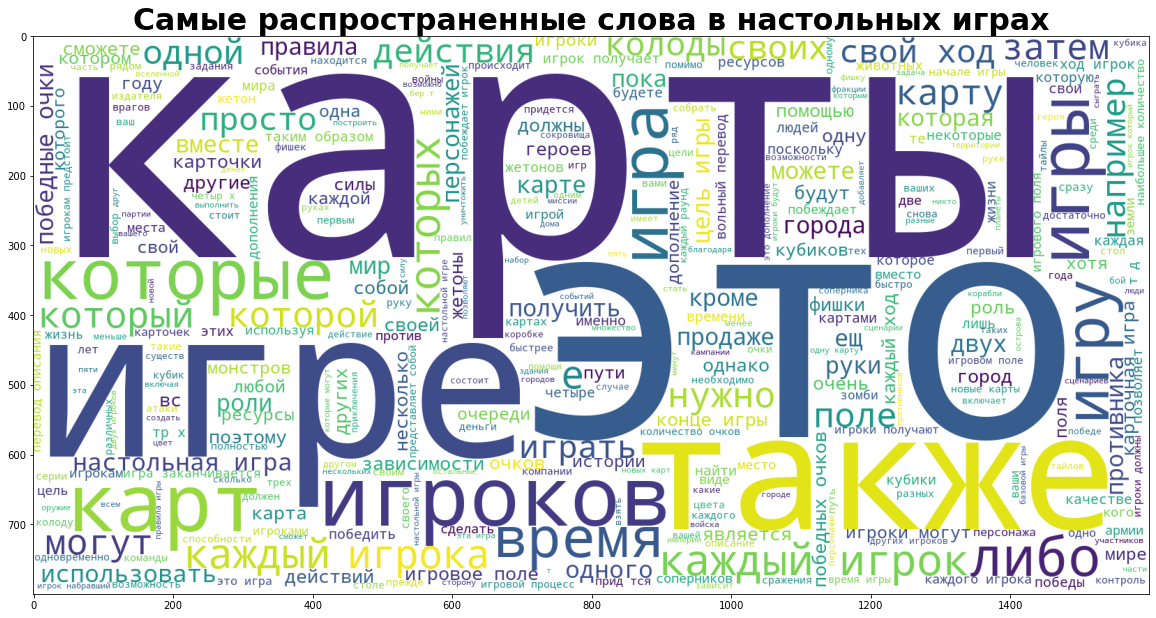

In [57]:
nltk.download('stopwords')
stopwords = list(stopwords.words('russian'))


plt.figure(figsize=(20,20))
plt.title('Самые распространенные слова в настольных играх', fontsize=30, weight=600)
wc = WordCloud(max_words=1000, min_font_size=10, background_color='white',
                height=800,width=1600, stopwords=stopwords).generate(' '.join(df_content_based['description']))

plt.imshow(wc)

In [58]:
# напишу функцию для лемматизации текста

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()


def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

[nltk_data] Downloading package punkt to /Users/pgagp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/pgagp/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
# создаю новый столбец с объедененным текстом

df_content_based['common'] = (df_content_based['category'] + 
#                               df_content_based['descriptionShort'] + 
                              df_content_based['description']).apply(lemmatize_text)

In [60]:
# что получилось

df_content_based['common'].iloc[234]

'азартные карты вы думали что покончили с королем в желтом когда проклятая пьеса впервые появилась в аркхэме за ней последовала череда исчезновений заблуждений самоубийств и безумия на протяжении всего цикла путь к каркозе который ознаменовал собой вторую полнометражную кампанию ужас аркхэма карточная игра поиск ответов привел вас через море к сияющим огням парижа и дальше в туманную каркозу и к трону самого хастура в восьми уникальных сценариях которые проверили вашу убежденность заставили усомниться в своих чувствах и довели до грани безумия но теперь безумие возвращается в аркхэм для выступления на бис'

In [61]:
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(df_content_based['common'])
cosine_similarities = linear_kernel(matrix, matrix)

In [62]:
# Напишу функицю которая возвращает 15 наиболее похожих фильмов на основе оценки косинусного сходства.

game_title = df_content_based['title']
indices = pd.Series(df_content_based.index, index=df_content_based['title'])


def content_recommender(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:16]
    games_indices = [i[0] for i in sim_scores]
    return game_title.iloc[games_indices]

In [63]:
# посмотрим какие рекомендации получим на примере игры "Покорение марса"

content_recommender('Покорение Марса')

13250                               TINYforming Mars
4235     Terraforming Mars: Ares Expedition - Crisis
5216                              Покорители космоса
11335                                Frozen Frontier
1007                                           Ceres
538                                     Король воров
11382                      На Марсе: Набор улучшений
11509                 Tramways: Dystopian Expansions
11768                                       На Марсе
12209                                        Outpost
6000                      Warhammer 40 000: Conquest
3598                                      Mythotopia
11208                                   LUNA Capital
1046                   Infinity Deathmatch: TAG Raid
5616                       Helionox: The Last Sunset
Name: title, dtype: object

В целом довольно наивный рекомендатель, основанный на содержании, может дать неплохие результаты. 

### Collaborative Filtering

Чтобы устранить ограничения content based метода, совместная фильтрация одновременно использует сходство между пользователями и элементами для предоставления рекомендаций. Это позволяет давать качественные рекомендации, то есть модели совместной фильтрации могут рекомендовать элемент пользователю A на основе интересов аналогичного пользователя B.

In [119]:
df_games = games.copy()

In [120]:
# преобразую категориальные данные с помощью кодировки
encoded_cols = pd.get_dummies(df_games['name'])

In [121]:
df_games = df_games.join(encoded_cols)

In [122]:
# удаляю ненужные стообцы

df_games = df_games.drop(columns=['teseraId', 'title', 'descriptionShort', 'description', 'n10Rating', 'n20Rating',
                               'bggGeekRating', 'playersMinRecommend', 'playersMaxRecommend', 
                               'numVotes', 'timeToLearn', 'name', 'category', 'commentsTotal', 'creationDateUtc'])

In [123]:
# выбираю столбцы с числовыми данными для масштабирования данных

cols = ['year', 'ratingUser',
       'bggRating', 'bggNumVotes', 'playersMin', 'playersMax', 
       'playersAgeMin', 'playtimeMin', 'playtimeMax']

In [124]:
# масштабирую с помощью StandardScaler
st_df = df_games[cols]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(st_df)

df_games[cols] = scaled_data

In [125]:
df_users = users.copy()

In [126]:
df_users = df_users[['game_alias', 'rating', 'user_teseraid', 'user_login']]
df_users = df_users.rename(columns={'game_alias':'alias'})

In [127]:
le = LabelEncoder()

df_users['item_id'] = le.fit_transform(df_users['alias'])
df_users['user_id'] = le.fit_transform(df_users['user_teseraid'])

In [128]:
df_games = df_games.merge(df_users[['alias', 'item_id']], on='alias', how='right')

In [129]:
df_games = df_games.drop_duplicates()
df_games = df_games.dropna()

In [130]:
df_games['alias'].nunique()

11848

In [131]:
games_lightfm = df_games.copy()
users_lightfm = df_users.copy()

In [133]:
users_lightfm['user_id'].nunique()

11791

In [135]:
users_lightfm = users_lightfm[['user_id', 'item_id', 'rating']].sort_values(by='user_id')

In [136]:
users_lightfm

,user_id,item_id,rating
111785,0,5566,7.25
263003,0,9196,5.00
9951,0,12124,8.75
257161,0,1215,8.25
284706,0,2545,6.00
...,...,...,...
382116,11788,4489,10.00
359725,11788,3746,10.00
26565,11788,11524,10.00
358230,11789,4783,10.00


In [137]:
users_lightfm['item_id'].nunique()

14711

In [138]:
games_lightfm = games_lightfm.iloc[:, 1:]

In [139]:
games_lightfm = games_lightfm.sort_values(by='item_id')

In [140]:
dataset_cf = Dataset()
dataset_cf.fit(users=users_lightfm['user_id'].unique(), 
            items=users_lightfm['item_id'].unique())

In [141]:
(interactions_cf, _) = dataset_cf.build_interactions(
    (row['user_id'], row['item_id'], row['rating']) for _, row in users_lightfm.iterrows())

In [142]:
interactions_cf

<11791x14711 sparse matrix of type '<class 'numpy.int32'>'
	with 388953 stored elements in COOrdinate format>

In [143]:
train_cf, test_cf = random_train_test_split(interactions_cf, test_percentage=0.2, random_state=42)

In [166]:
# no_components_values = [16, 32, 64, 128]
# learning_rate_values = [0.05, 0.1]
# loss_values = ['warp', 'bpr']


# for no_components in no_components_values:
#     for learning_rate in learning_rate_values:
#         for loss in loss_values:
#             model = LightFM(no_components=no_components, learning_rate=learning_rate, loss=loss)
            
#             model.fit(train_cf, epochs=10)
            
#             score = precision_at_k(model, test_cf, k=5).mean()
            
#             print('lightfm CF')
#             print('loss:', loss)
#             print('размерность итоговых векторов:', no_components)
#             print('learning_rate:', learning_rate)
#             print('precision_at_k:', score)
#             print('============')

         model  loss  dimensionality  learning_rate  precision_at_k
0   lightfm CF  warp              16           0.05        0.054416
1   lightfm CF   bpr              16           0.05        0.045370
2   lightfm CF  warp              16           0.10        0.052469
3   lightfm CF   bpr              16           0.10        0.038936
4   lightfm CF  warp              32           0.05        0.057811
5   lightfm CF   bpr              32           0.05        0.044183
6   lightfm CF  warp              32           0.10        0.047934
7   lightfm CF   bpr              32           0.10        0.031220
8   lightfm CF  warp              64           0.05        0.056648
9   lightfm CF   bpr              64           0.05        0.040385
10  lightfm CF  warp              64           0.10        0.039506
11  lightfm CF   bpr              64           0.10        0.026021
12  lightfm CF  warp             128           0.05        0.051591
13  lightfm CF   bpr             128           0.05        0.036871
14  lightfm CF  warp             128           0.10        0.026092
15  lightfm CF   bpr             128           0.10        0.022246

In [144]:
model_cf_warp = LightFM(loss='warp', 
                    no_components=32,
                    learning_rate=0.05,
                    random_state=42)

In [145]:
model_cf_warp.fit(train_cf, epochs=10)

In [146]:
train_cf_auc = auc_score(model_cf_warp, train_cf).mean()
test_cf_auc = auc_score(model_cf_warp, test_cf).mean()

print('AUC: train %.2f, test %.2f.' % (train_cf_auc, test_cf_auc))

AUC: train 0.98, test 0.94.


In [147]:
score_cf_warp = precision_at_k(model_cf_warp, test_cf, k=5).mean()
print(score_cf_warp)

0.05655271


In [173]:
recallcf_warp_train = recall_at_k(model_cf_warp, train_cf, k=5).mean()
recallcf_warp_test = recall_at_k(model_cf_warp, test_cf, k=5).mean()
print(recallcf_warp_train)
print(recallcf_warp_test)

0.11308843829991579
0.05525503098863386


Обучение модели колаборативной фильтрации с функцией потерь 'bpr'

In [148]:
model_cf_brp = LightFM(loss='bpr', 
                    no_components=16,
                    learning_rate=0.05,
                    random_state=42)

model_cf_brp.fit(train_cf, epochs=10)

train_cf_auc_brp = auc_score(model_cf_brp, train_cf).mean()
test_cf_auc_brp = auc_score(model_cf_brp, test_cf).mean()

print('AUC: train %.2f, test %.2f.' % (train_cf_auc_brp, test_cf_auc_brp))

AUC: train 0.92, test 0.86.


In [149]:
score_cf_brp = precision_at_k(model_cf_brp, test_cf, k=5).mean()
print(score_cf_warp)

0.05655271


In [174]:
recallcf_brp_train = recall_at_k(model_cf_brp, train_cf, k=5).mean()
recallcf_brp_test = recall_at_k(model_cf_brp, test_cf, k=5).mean()
print(recallcf_brp_train)
print(recallcf_brp_test)

0.13808005114210545
0.04731266933928259


### Hybrid model

In [150]:
dataset_hybrid = Dataset(user_identity_features=False)
dataset_hybrid.fit(users=users_lightfm['user_id'].unique(), 
            items=users_lightfm['item_id'].unique())

In [151]:
for col in games_lightfm.columns[:-1]:
    dataset_hybrid.fit_partial(item_features=(games_lightfm[col]))

In [152]:
%%time

(interactions_hybrid, _) = dataset_hybrid.build_interactions(
    (row['user_id'], row['item_id'], row['rating']) for _, row in users_lightfm.iterrows())

CPU times: user 28.6 s, sys: 415 ms, total: 29 s
Wall time: 31.5 s


In [153]:
features_list = []

for index, row in games_lightfm.iterrows():
    id_value = row['item_id']
    features = tuple(row.drop('item_id'))
    features_list.append((int(id_value), features))

In [154]:
item_features = dataset_hybrid.build_item_features(features_list)
item_features

<14711x21600 sparse matrix of type '<class 'numpy.float32'>'
	with 156885 stored elements in Compressed Sparse Row format>

In [155]:
train_hybrid, test_hybrid = random_train_test_split(interactions_hybrid, test_percentage=0.2, random_state=42)

In [170]:
# no_components_values = [32, 64, 128]
# learning_rate_values = [0.05, 0.1]
# loss_values = ['warp', 'bpr']



# for no_components in no_components_values:
#     for learning_rate in learning_rate_values:
#         for loss in loss_values:
#             model = LightFM(item_alpha = 0.001, no_components=no_components, learning_rate=learning_rate, loss=loss)
            
#             model.fit(train_hybrid, item_features=item_features, epochs=10)
            
#             score = precision_at_k(model, test_hybrid, item_features=item_features, k=5).mean()
            
#             print('loss:', loss)
#             print('размерность итоговых векторов:', no_components)
#             print('learning_rate:', learning_rate)
#             print('precision_at_k:', score)
#             print('============')

     loss  dimension  learning_rate  precision_at_k
0    warp         32           0.05        0.019858
1     bpr         32           0.05        0.002455
2    warp         32           0.10        0.014772
3     bpr         32           0.10        0.006519
4    warp         64           0.05        0.013609
5     bpr         64           0.05        0.001624
6    warp         64           0.10        0.013371
7     bpr         64           0.10        0.004501
8    warp        128           0.05        0.013751
9     bpr        128           0.05        0.001909
10   warp        128           0.10        0.010997
11    bpr        128           0.10        0.002650

In [156]:
model_hybrid = LightFM(loss='warp', 
                    no_components=32,
                    learning_rate=0.05,
                    item_alpha = 0.001,
                    random_state=42)

model_hybrid.fit(train_hybrid, item_features=item_features, epochs=10)

In [157]:
train_hybrid_auc = auc_score(model_hybrid, train_hybrid, item_features=item_features).mean()
test_hybrid_auc = auc_score(model_hybrid, test_hybrid, item_features=item_features).mean()

print('AUC: train %.2f, test %.2f.' % (train_hybrid_auc, test_hybrid_auc))

AUC: train 0.84, test 0.83.


In [169]:
score = precision_at_k(model_hybrid, test_hybrid, item_features=item_features, k=5).mean()
print(score)

0.013509022


In [176]:
recall_hybrid_train = recall_at_k(model_hybrid, train_hybrid, item_features=item_features,k=5).mean()
recall_hybrid_test = recall_at_k(model_hybrid, test_hybrid, item_features=item_features,k=5).mean()
print(recall_hybrid_train)
print(recall_hybrid_test)

0.016057051560219145
0.010643733101565411


Посмотрим рекомендации

In [102]:
def per_recommend_items(model, user_id, num_items=10):
    scores = model.predict(user_id, np.arange(model.item_embeddings.shape[0]))
    top_item_indices = np.argsort(-scores)
    top_item_ids = top_item_indices[:num_items]

    return top_item_ids

Коллаборативная фильтрация

loss = 'warp'

In [103]:
per_recommend_items(model_cf_warp, 123)

array([186, 123, 145,   7, 122, 401, 170,  90, 696, 572])

Коллаборативная фильтрация

loss = 'brp'

In [104]:
per_recommend_items(model_cf_brp, 123)

array([  7, 104, 399,  27, 322,  64,  36, 537, 622, 534])

Гибридная модель

In [105]:
per_recommend_items(model_hybrid, 123)

array([18616,  5130,  6503, 19069, 12120,  4612,  9423,   104, 17952,
       17030])

In [118]:
# file_path = 'model_cf.pkl'

# with open(file_path, 'wb') as f:
#     pickle.dump(model_cf_warp, f)

In [116]:
# file_path1 = 'model_hybrid.pkl'

# with open(file_path1, 'wb') as f:
#     pickle.dump(model_hybrid, f)